In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import load_img, img_to_array
from sklearn import model_selection
from collections import Counter
import keras
from keras.models import Sequential
from keras.layers import Activation, MaxPooling1D, Dropout, Flatten, Reshape, Dense, Conv1D, LSTM,SpatialDropout1D,GRU
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from random import randrange
from random import seed
from random import random
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from PIL import Image
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
import pickle
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score, f1_score
import os
import sys

2.12.0
2.12.0


In [3]:
from google.colab import files
data = files.upload()

Saving kaggle.json to kaggle (1).json


In [4]:
!pip install -q kaggle

In [5]:
! mkdir -p ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d richardcao1/frames-256x256

frames-256x256.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
! unzip /content/frames-256x256.zip

Streaming output truncated to the last 5000 lines.
  inflating: frames/train/k/179.jpg  
  inflating: frames/train/k/18.jpg   
  inflating: frames/train/k/180.jpg  
  inflating: frames/train/k/181.jpg  
  inflating: frames/train/k/182.jpg  
  inflating: frames/train/k/183.jpg  
  inflating: frames/train/k/184.jpg  
  inflating: frames/train/k/185.jpg  
  inflating: frames/train/k/186.jpg  
  inflating: frames/train/k/187.jpg  
  inflating: frames/train/k/188.jpg  
  inflating: frames/train/k/189.jpg  
  inflating: frames/train/k/19.jpg   
  inflating: frames/train/k/190.jpg  
  inflating: frames/train/k/191.jpg  
  inflating: frames/train/k/192.jpg  
  inflating: frames/train/k/193.jpg  
  inflating: frames/train/k/194.jpg  
  inflating: frames/train/k/195.jpg  
  inflating: frames/train/k/196.jpg  
  inflating: frames/train/k/197.jpg  
  inflating: frames/train/k/198.jpg  
  inflating: frames/train/k/199.jpg  
  inflating: frames/train/k/2.jpg    
  inflating: frames/train/k/20.jpg   

In [11]:
# size of the image: 48*48 pixels


# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/frames/"


datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# create a generator
train_generator = datagen.flow_from_directory(
    base_path + "train/",
    target_size=(pic_size, pic_size),
    batch_size=256,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    base_path + "validation/",
    target_size=(pic_size, pic_size),
    batch_size=256,
    class_mode='categorical')


Found 7088 images belonging to 37 classes.
Found 1521 images belonging to 37 classes.


In [12]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [13]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                    rotation_range=45,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

train_dataset = train_datagen.flow_from_directory('/content/frames/train', target_size=(64,64), batch_size=256, class_mode='categorical')

validation_dataset = ImageDataGenerator(rescale=1/255).flow_from_directory('/content/frames/validation', target_size=(64,64), batch_size=256, class_mode='categorical')




Found 7088 images belonging to 37 classes.
Found 1521 images belonging to 37 classes.


In [14]:
from tensorflow.keras.layers import GRU, Conv2D, MaxPooling2D, Dropout, Flatten, TimeDistributed, Dense, Activation

model = Sequential()
model.add(Conv2D(filters= 64, kernel_size=(3,3), activation ='relu',strides = (2,2), padding = 'valid', input_shape= (64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(filters= 128, kernel_size=(3,3), activation ='relu',strides = (2,2), padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(filters= 256, kernel_size=(3,3), activation ='relu',strides = (2,2), padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(TimeDistributed(Flatten()))
model.add(GRU(128))
model.add(Dropout(0.5))
model.add(Dense(37, activation='softmax'))

optimizer = keras.optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, epochs=100, batch_size=5, validation_data=validation_dataset)


Epoch 1/100
28/28 [==============================] - 22s 695ms/step - loss: 3.4759 - accuracy: 0.0617 - val_loss: 3.5690 - val_accuracy: 0.0388
Epoch 2/100
28/28 [==============================] - 18s 643ms/step - loss: 3.4336 - accuracy: 0.0717 - val_loss: 3.6020 - val_accuracy: 0.0388
Epoch 3/100
28/28 [==============================] - 19s 677ms/step - loss: 3.4217 - accuracy: 0.0727 - val_loss: 3.6053 - val_accuracy: 0.0388
Epoch 4/100
28/28 [==============================] - 19s 680ms/step - loss: 3.4182 - accuracy: 0.0686 - val_loss: 3.5915 - val_accuracy: 0.0388
Epoch 5/100
28/28 [==============================] - 19s 655ms/step - loss: 3.4127 - accuracy: 0.0705 - val_loss: 3.5733 - val_accuracy: 0.0388
Epoch 6/100
28/28 [==============================] - 19s 685ms/step - loss: 3.4023 - accuracy: 0.0718 - val_loss: 3.5941 - val_accuracy: 0.0388
Epoch 7/100
28/28 [==============================] - 20s 703ms/step - loss: 3.4064 - accuracy: 0.0711 - val_loss: 3.5879 - val_accuracy:

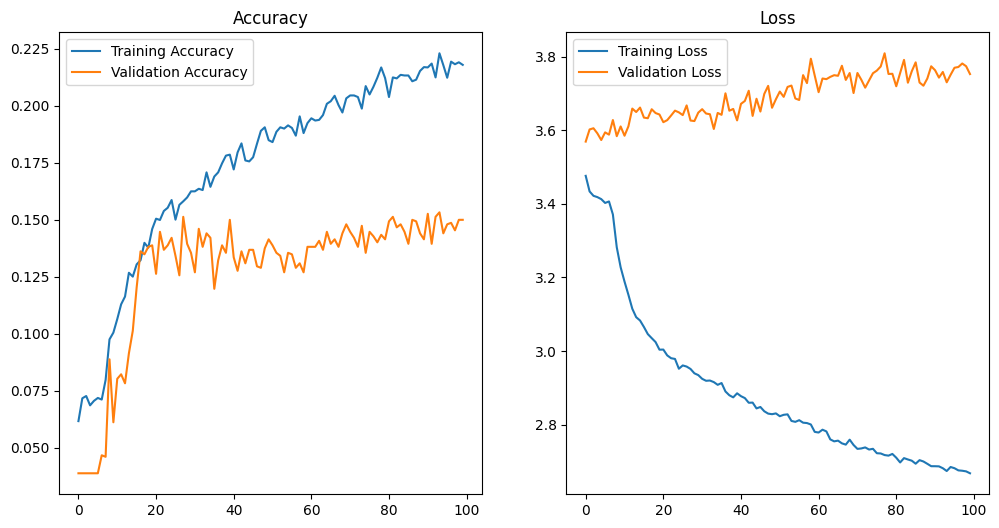

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()